<a href="https://colab.research.google.com/github/Souvik2biswas/Zambia-covid19-omdena/blob/main/zambia_covid19regression_newcases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

# Read the text file with a custom delimiter
df = pd.read_csv('https://dagshub.com/Omdena/KitweChapter_ForecastingCOVID19Dynamics/raw/3a90494983d48b8b16cf9ad0bf31a7be4ae42a2e/preprocessed_data_updated.csv', parse_dates=['Unnamed: 0'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df

Unnamed: 0  1 confirmed per every  1 died per every  \
0    2020-01-05               457974.0        17861000.0   
1    2020-01-06               457974.0        17861000.0   
2    2020-01-07               457974.0        17861000.0   
3    2020-01-08               457974.0        17861000.0   
4    2020-01-09               457974.0        17861000.0   
...         ...                    ...               ...   
1564 2024-04-17                   53.0            4417.0   
1565 2024-04-18                   53.0            4417.0   
1566 2024-04-19                   53.0            4417.0   
1567 2024-04-20                   53.0            4417.0   
1568 2024-04-21                   53.0            4417.0   

      Affected population, %  Confirmed per 1000  Daily growth, %  \
0                   0.000218            0.002184         8.333333   
1                   0.000218            0.002184         8.333333   
2                   0.000218            0.002184         8.333333   
3                   0.000218            0.002184         8.333333   
4                   0.000218            0.002184         8.333333   
...                      ...                 ...              ...   
1564                1.904552           19.045518         0.065598   
1565                1.904552           19.045518         0.065598   
1566                1.904552           19.045518         0.065598   
1567                1.904552           19.045518         0.065598   
1568                1.904552           19.045518         0.065598   

      Died per 1000  Merged_Case_Fatality_Ratio  Merged_Incident_Rate  \
0          0.000056                    0.662252              5.749579   
1          0.000056                    0.662252              5.749579   
2          0.000056                    0.662252              5.749579   
3          0.000056                    0.662252              5.749579   
4          0.000056                    0.662252              5.749579   
...             ...                         ...                   ...   
1564       0.226415                    1.182333           1866.491630   
1565       0.226415                    1.182333           1866.491630   
1566       0.226415                    1.182333           1866.491630   
1567       0.226415                    1.182333           1866.491630   
1568       0.226415                    1.182333           1866.491630   

      aged_65_older  ...  vaccinated24hours        rfh    rfh_avg         r1h  \
0              2.48  ...                0.0  77.266073  83.418344  254.832129   
1              2.48  ...                0.0  77.266073  83.418344  254.832129   
2              2.48  ...                0.0  77.266073  83.418344  254.832129   
3              2.48  ...                0.0  77.266073  83.418344  254.832129   
4              2.48  ...                0.0  77.266073  83.418344  254.832129   
...             ...  ...                ...        ...        ...         ...   
1564           2.48  ...             1840.0  13.921635  11.281279   77.256116   
1565           2.48  ...             1840.0  13.158919  11.021232   75.794481   
1566           2.48  ...             1840.0  12.396204  10.761185   74.332846   
1567           2.48  ...             1840.0  11.633488  10.501138   72.871211   
1568           2.48  ...             1840.0  10.870772  10.241091   71.409576   

         r1h_avg         r3h    r3h_avg         rfq         r1q        r3q  
0     238.946227  490.050145  562.00689   95.184301  107.705153  87.734354  
1     238.946227  490.050145  562.00689   95.184301  107.705153  87.734354  
2     238.946227  490.050145  562.00689   95.184301  107.705153  87.734354  
3     238.946227  490.050145  562.00689   95.184301  107.705153  87.734354  
4     238.946227  490.050145  562.00689   95.184301  107.705153  87.734354  
...          ...         ...        ...         ...         ...        ...  
1564   68.192398  302.102299  451.73312  115.139760  109.443896  6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Unnamed: 0                                  1569 non-null   datetime64[ns]
 1   1 confirmed per every                       1569 non-null   float64       
 2   1 died per every                            1569 non-null   float64       
 3   Affected population, %                      1569 non-null   float64       
 4   Confirmed per 1000                          1569 non-null   float64       
 5   Daily growth, %                             1569 non-null   float64       
 6   Died per 1000                               1569 non-null   float64       
 7   Merged_Case_Fatality_Ratio                  1569 non-null   float64       
 8   Merged_Incident_Rate                        1569 non-null   float64       
 9   aged_65_

In [ ]:
# Clean feature names
df.columns = df.columns.str.replace(' ', '_').str.replace('[^A-Za-z0-9_]', '', regex=True)

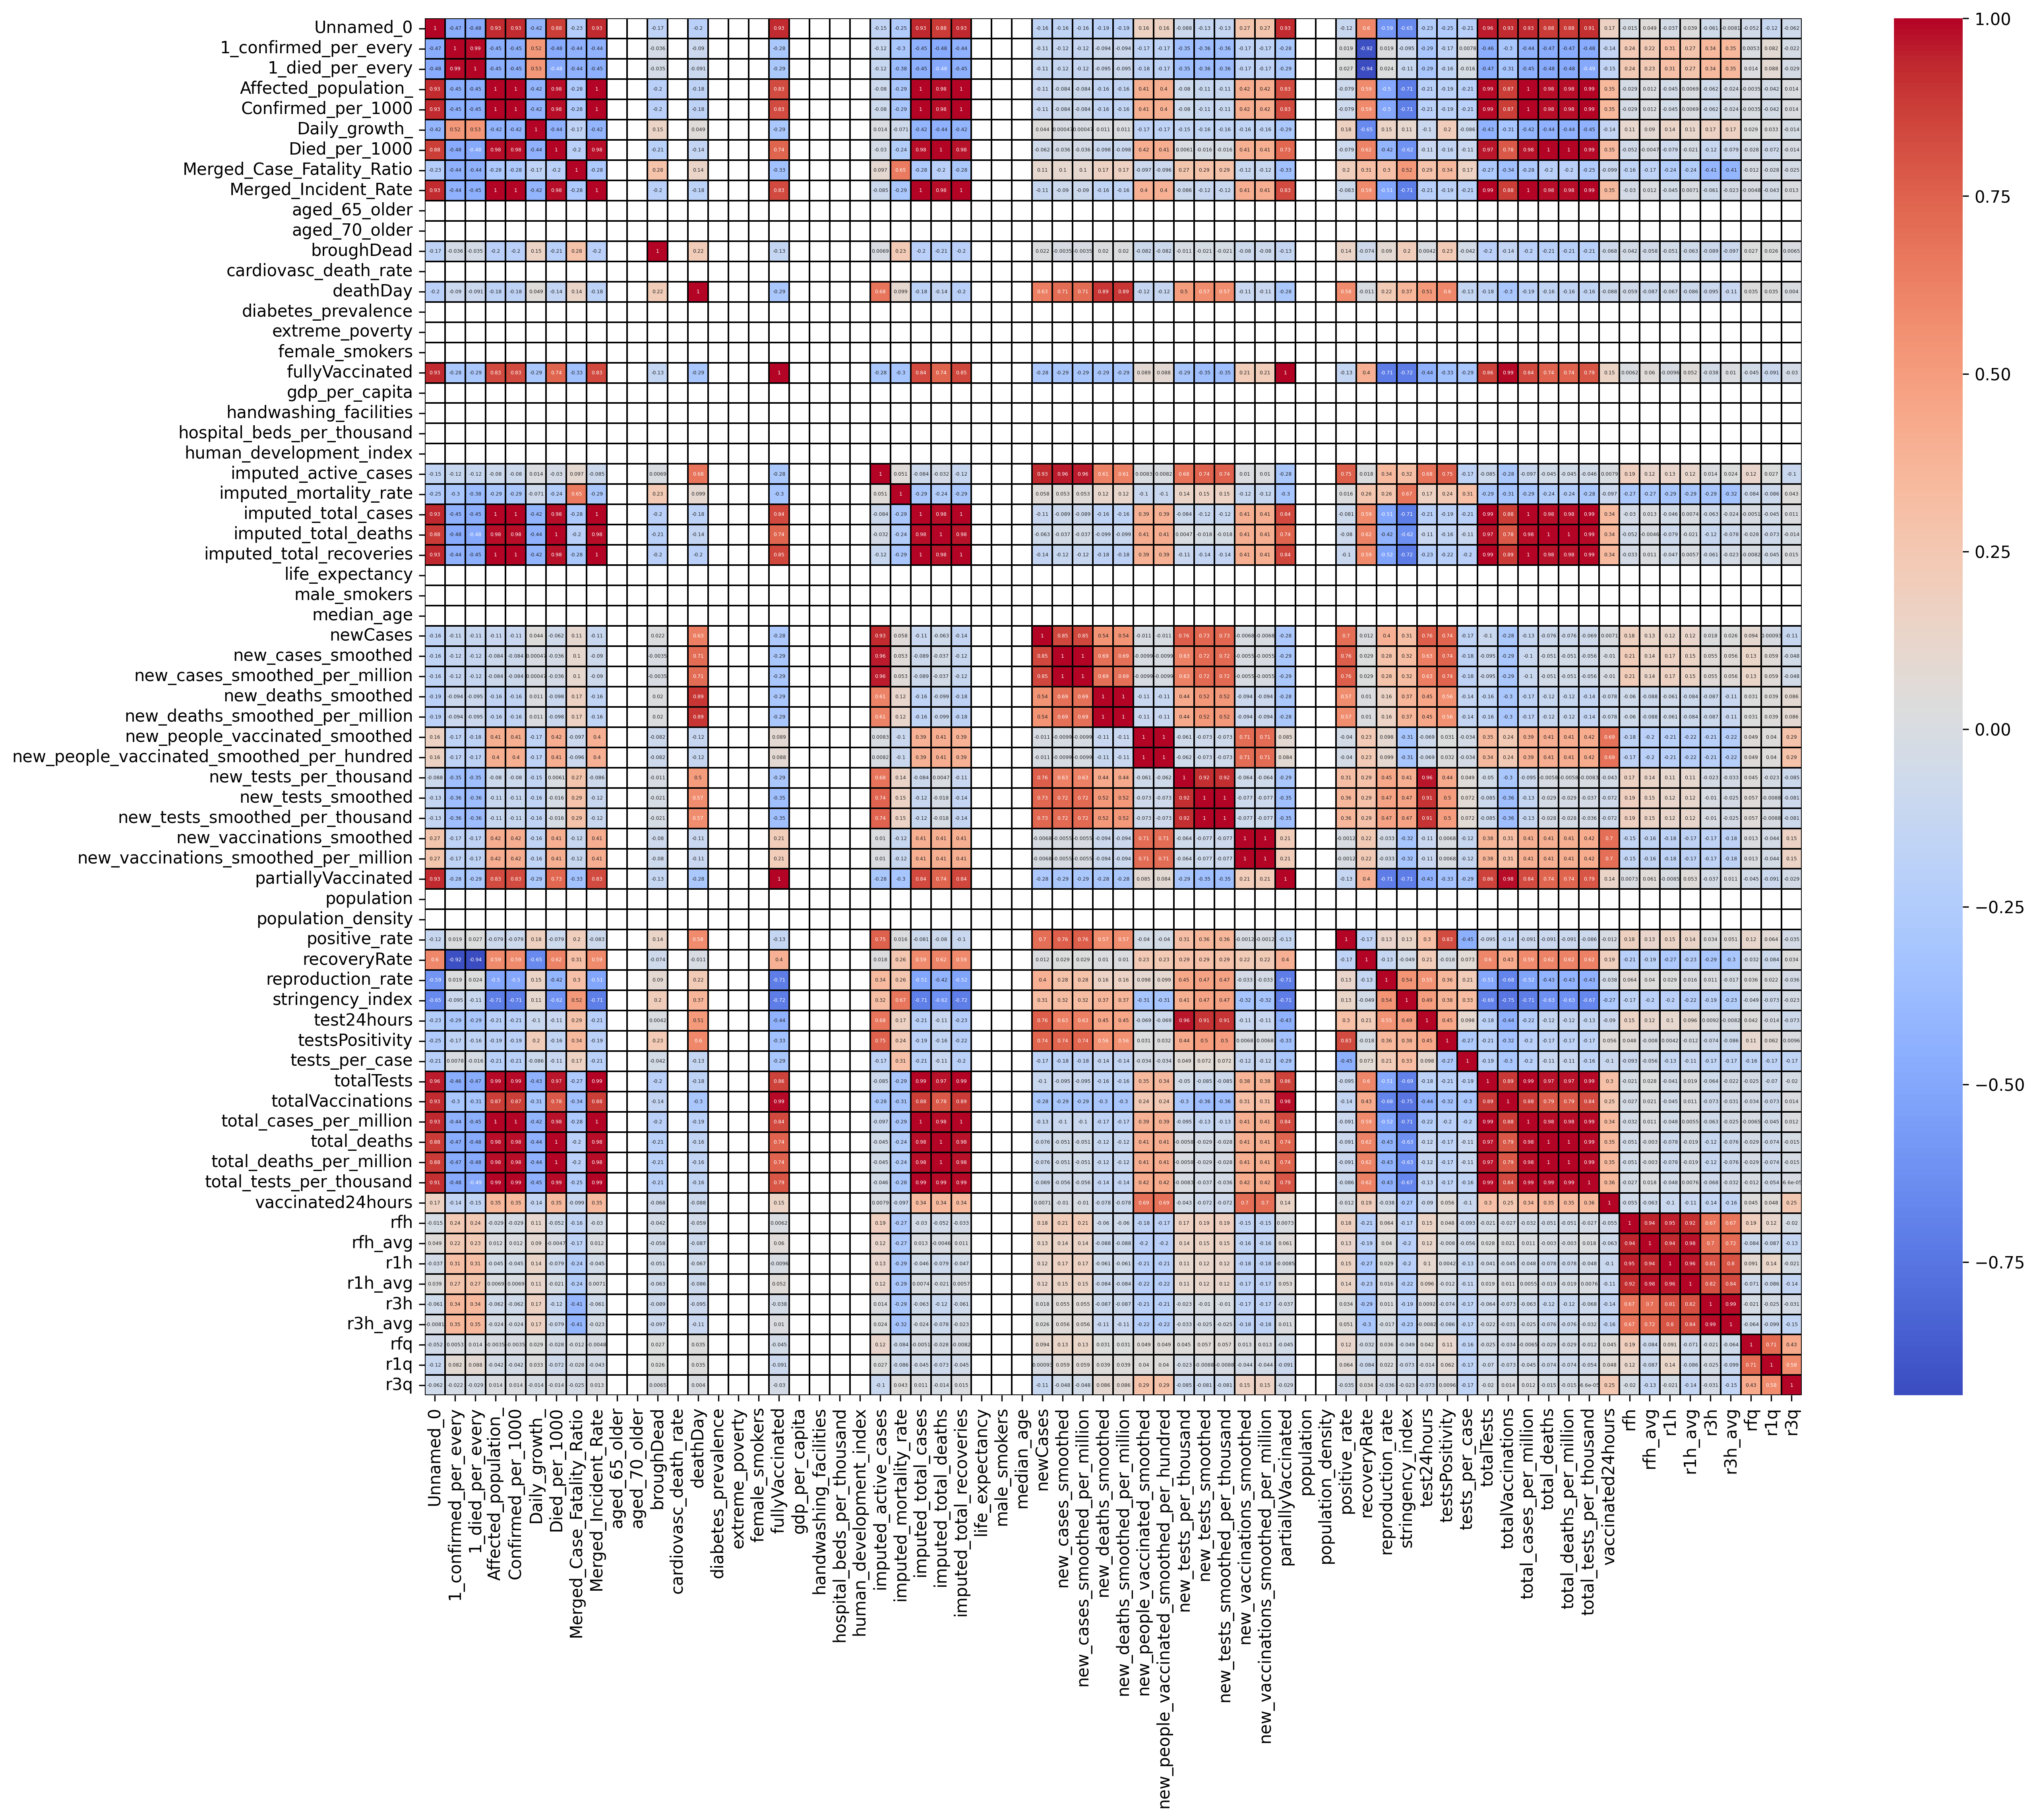

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15), dpi=300)

# Draw the heatmap
g = sns.heatmap(df.corr(), cbar = True, annot=True, annot_kws={'size': 3}, square = True, cmap='coolwarm', linewidths=.5, linecolor="k")
g.set_xticklabels(rotation=90, labels = df.columns, size = 10)
g.set_yticklabels(rotation=0, labels = df.columns, size = 10)

# Show the plot
plt.show()


In [ ]:
X=df.drop(['new_cases_smoothed','Unnamed_0'],axis=1)
y=df["new_cases_smoothed"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
len(X_train),len(y_train)

(1255, 1255)

In [ ]:
len(X_test),len(y_test)

(314, 314)

In [ ]:
ts_cv = TimeSeriesSplit(
    n_splits=3,
    max_train_size=1255,
    test_size=314,
)

In [ ]:
import xgboost as xgb
from skopt.space import Real, Categorical, Integer

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
param_grid_xgb = {
    'n_estimators': Integer(50, 500),
    'learning_rate': Real(1e-4, 0.1, 'log-uniform'),
    'max_depth': Integer(3, 32),
    'min_child_weight': Integer(1, 5),
    'subsample': Real(0.8, 1.0),
    'colsample_bytree': Real(0.6, 1.0)
}

In [ ]:
import skopt
from skopt import BayesSearchCV
np.int = np.int64

bay_search = BayesSearchCV(estimator = xgb_model,
                    search_spaces = param_grid_xgb,
                    n_iter = 120,
                    cv = ts_cv,
                    scoring = 'neg_mean_squared_error')

bay_search.fit(X_train, y_train)

BayesSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=1255, n_splits=3, test_size=314),
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, imp...
                             'learning_rate': Real(low=0.0001, high=0.1, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=32, prior='uniform', transform='normalize'),
                             'min_child_weight': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.8, high=1.0, prior='uniform', transform='normalize')})

In [ ]:
print("val. score: %s" % bay_search.best_score_)
print("test score: %s" % bay_search.score(X, y))
print("best params: %s" % str(bay_search.best_params_))

val. score: -948.5471068596344
test score: -0.35794894701402874
best params: OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.07822106061564453), ('max_depth', 3), ('min_child_weight', 1), ('n_estimators', 222), ('subsample', 1.0)])


In [ ]:
best_params = bay_search.best_params_
best_model = bay_search.best_estimator_

In [ ]:
predictions = best_model.predict(X_test).reshape(-1,1)
predictions

array([[ 4.09024134e-02],
       [ 2.66283955e-02],
       [ 5.43124512e+02],
       [ 3.46257172e+01],
       [ 1.68177299e+01],
       [ 2.82063437e+00],
       [ 7.16818314e+01],
       [ 1.33728256e+02],
       [ 1.41887398e+01],
       [ 1.41181201e+03],
       [-3.55837420e-02],
       [ 5.42177185e+02],
       [ 8.60554799e-02],
       [ 2.67235107e+01],
       [ 6.62084961e+00],
       [ 9.72237625e+01],
       [ 2.36749058e+01],
       [ 7.73603363e+01],
       [ 2.02480722e-02],
       [ 5.06446381e+01],
       [ 5.24881855e-02],
       [ 2.02480722e-02],
       [ 2.78180819e-02],
       [ 5.24881855e-02],
       [ 4.95588160e+00],
       [ 1.52815809e+01],
       [ 1.71110626e+02],
       [ 6.40786819e+01],
       [ 5.72715302e+01],
       [ 6.73530655e+01],
       [ 4.28908691e-02],
       [ 1.22713596e-01],
       [ 4.92842133e+02],
       [ 1.51016373e+02],
       [ 8.16842914e-01],
       [ 3.52745247e+01],
       [ 6.44587219e+02],
       [ 2.77218075e+01],
       [ 1.7

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
RMSE = np.sqrt(MSE(predictions,y_test))
RMSE

0.8124405837026658

In [ ]:
from sklearn.metrics import r2_score as R2
R2_score=R2(predictions,y_test)
R2_score

0.9999964270481677

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(predictions, y_test)
MAPE

0.2201258180501507

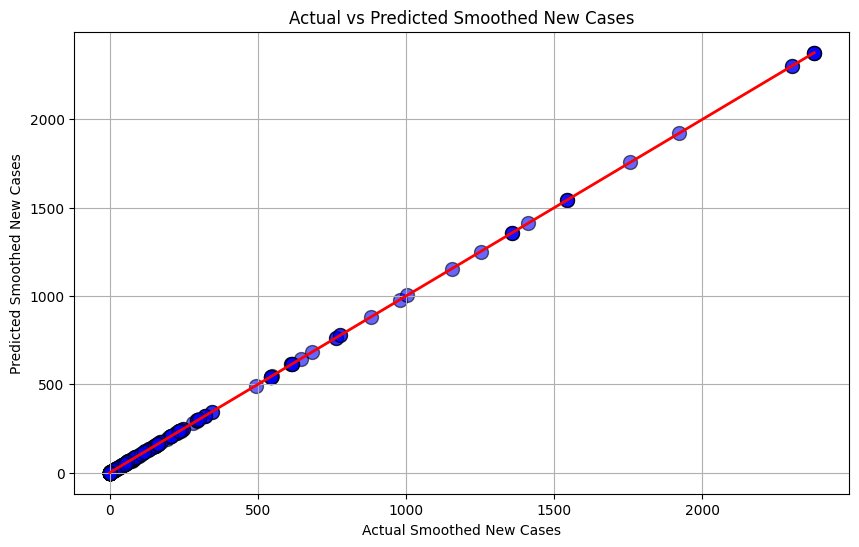

In [ ]:
import matplotlib.pyplot as plt
# Step 8: Visualize the actual vs. predicted data points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', edgecolors='k', alpha=0.6, s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Smoothed New Cases')
plt.ylabel('Predicted Smoothed New Cases')
plt.title('Actual vs Predicted Smoothed New Cases')
plt.grid(True)
plt.show()


In [ ]:
from skopt.space import Real, Categorical, Integer

param_grid_rfr = {
    'bootstrap': [True, False],
    'n_estimators': Integer(50, 300),
    'min_weight_fraction_leaf': Real(0.0, 0.5),
    'min_samples_split': Integer(2, 5),
    'min_samples_leaf': Integer(1, 5),
    'max_depth': Integer(2, 32),
    'random_state': Integer(0, 150),
    'warm_start': [True, False]
}

In [ ]:
rfr_model = RandomForestRegressor(criterion='squared_error')

In [ ]:
import skopt
from skopt import BayesSearchCV
np.int = np.int64

bay_search = BayesSearchCV(estimator = rfr_model,
                    search_spaces = param_grid_rfr,
                    n_iter = 100,
                    cv = ts_cv,
                    scoring = 'neg_mean_squared_error')

bay_search.fit(X_train, y_train)

BayesSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=1255, n_splits=3, test_size=314),
              estimator=RandomForestRegressor(), n_iter=100,
              scoring='neg_mean_squared_error',
              search_spaces={'bootstrap': [True, False],
                             'max_depth': Integer(low=2, high=32, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=5, prior='uniform', transform='normali...
                             'min_samples_split': Integer(low=2, high=5, prior='uniform', transform='normalize'),
                             'min_weight_fraction_leaf': Real(low=0.0, high=0.5, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=300, prior='uniform', transform='normalize'),
                             'random_state': Integer(low=0, high=150, prior='uniform', transform='normalize'),
                             'warm_start': [True, False]})

In [ ]:
print("val. score: %s" % bay_search.best_score_)
print("test score: %s" % bay_search.score(X, y))
print("best params: %s" % str(bay_search.best_params_))

val. score: -3964.2202454137882
test score: -2.5503270255605606
best params: OrderedDict([('bootstrap', False), ('max_depth', 13), ('min_samples_leaf', 2), ('min_samples_split', 3), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 50), ('random_state', 137), ('warm_start', False)])


In [ ]:
best_params = bay_search.best_params_
best_model = bay_search.best_estimator_

In [ ]:
predictions = best_model.predict(X_test).reshape(-1,1)
predictions

array([[0.00000000e+00],
       [0.00000000e+00],
       [5.44354440e+02],
       [3.57140000e+01],
       [1.62232600e+01],
       [2.85700000e+00],
       [7.31430000e+01],
       [1.33246000e+02],
       [1.42860000e+01],
       [1.41185700e+03],
       [0.00000000e+00],
       [5.44354440e+02],
       [0.00000000e+00],
       [2.67140000e+01],
       [3.57100000e+00],
       [9.95710000e+01],
       [2.31430000e+01],
       [7.74290000e+01],
       [0.00000000e+00],
       [5.17140000e+01],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [5.00000000e+00],
       [1.52860000e+01],
       [1.71494700e+02],
       [6.31430000e+01],
       [5.52945600e+01],
       [6.75710000e+01],
       [0.00000000e+00],
       [1.43000000e-01],
       [4.93286000e+02],
       [1.51857000e+02],
       [8.57000000e-01],
       [3.44290000e+01],
       [6.42902600e+02],
       [2.78570000e+01],
       [1.71571000e+02],
       [1.20857000e+02],


In [ ]:
from sklearn.metrics import mean_squared_error as MSE
RMSE = np.sqrt(MSE(predictions,y_test))
RMSE

3.56979356539739

In [ ]:
from sklearn.metrics import r2_score as R2
R2_score=R2(predictions,y_test)
R2_score

0.9999311564085194

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(predictions, y_test)
MAPE

0.0007384517734761594

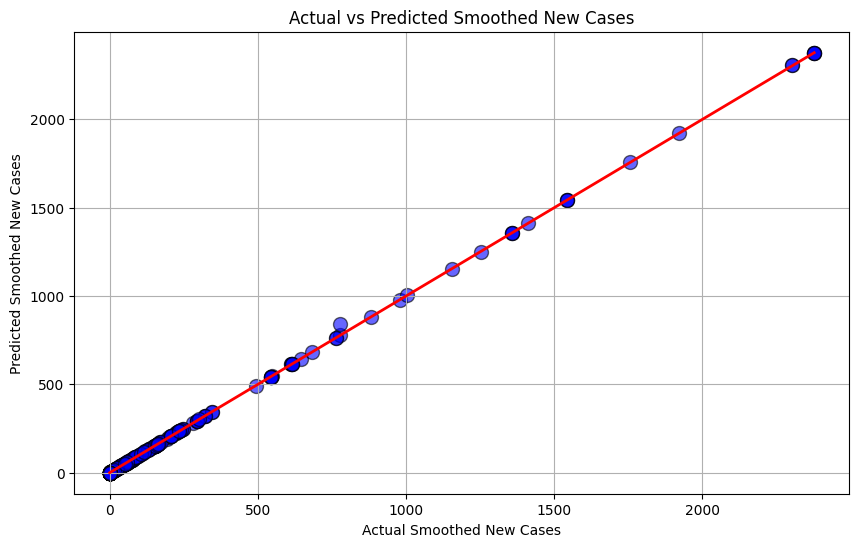

In [ ]:
import matplotlib.pyplot as plt
# Step 8: Visualize the actual vs. predicted data points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', edgecolors='k', alpha=0.6, s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Smoothed New Cases')
plt.ylabel('Predicted Smoothed New Cases')
plt.title('Actual vs Predicted Smoothed New Cases')
plt.grid(True)
plt.show()


In [ ]:
from lightgbm import LGBMRegressor
gbm_model = LGBMRegressor(objective='mean_squared_error', force_col_wise=True)

In [ ]:
from skopt.space import Real, Categorical, Integer

param_grid_gbm = {
    'boosting_type': ['gbdt', 'dart'],
    'n_estimators': Integer(50, 500),
    'learning_rate': Real(1e-4, 0.1),
    'max_depth': Integer(3, 10),
    'num_leaves': Integer(2, 1e+4),
    'random_state': Integer(1, 100),
    'colsample_bytree': Real(0.5, 1),
    'min_child_weight': Real(0.001, 1),
    'min_child_samples': Integer(10, 1000)

}

In [ ]:
import skopt
from skopt import BayesSearchCV
np.int = np.int64

bay_search = BayesSearchCV(estimator = gbm_model,
                    search_spaces = param_grid_gbm,
                    n_iter = 100,
                    cv = ts_cv,
                    scoring = 'neg_mean_squared_error')

bay_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

BayesSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=1255, n_splits=3, test_size=314),
              estimator=LGBMRegressor(force_col_wise=True,
                                      objective='mean_squared_error'),
              n_iter=100, scoring='neg_mean_squared_error',
              search_spaces={'boosting_type': ['gbdt', 'dart'],
                             'colsample_bytree': Real(low=0.5, high=1, prior='uniform', transform='normalize'),
                             'learning_rate': Real...
                             'min_child_samples': Integer(low=10, high=1000, prior='uniform', transform='normalize'),
                             'min_child_weight': Real(low=0.001, high=1, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=2, high=10000.0, prior='uniform', transform='normalize'),
                             'random_state': Integer(low=1, high=100, prior='uniform', transform='normalize')})

In [ ]:
print("val. score: %s" % bay_search.best_score_)
print("test score: %s" % bay_search.score(X, y))
print("best params: %s" % str(bay_search.best_params_))

val. score: -4841.495895144118
test score: -1.476219700939344
best params: OrderedDict([('boosting_type', 'gbdt'), ('colsample_bytree', 0.9852410555133462), ('learning_rate', 0.09006516972683114), ('max_depth', 4), ('min_child_samples', 10), ('min_child_weight', 0.001), ('n_estimators', 500), ('num_leaves', 7885), ('random_state', 43)])


In [ ]:
best_params = bay_search.best_params_
best_model = bay_search.best_estimator_

In [ ]:
predictions = best_model.predict(X_test).reshape(-1,1)
predictions

array([[ 1.91941012e-02],
       [ 1.83305639e-01],
       [ 5.45684800e+02],
       [ 3.59644806e+01],
       [ 1.57378838e+01],
       [ 2.49775333e+00],
       [ 7.28576699e+01],
       [ 1.33607216e+02],
       [ 1.42652481e+01],
       [ 1.41196280e+03],
       [-3.43748698e-02],
       [ 5.46673656e+02],
       [-3.43748698e-02],
       [ 2.67567264e+01],
       [ 3.88410002e+00],
       [ 9.94759056e+01],
       [ 2.30971292e+01],
       [ 7.74551693e+01],
       [ 2.73395188e-01],
       [ 5.05049402e+01],
       [-3.43748698e-02],
       [ 1.54210842e-02],
       [ 1.91941012e-02],
       [-3.43748698e-02],
       [ 5.32496020e+00],
       [ 1.49280629e+01],
       [ 1.70810168e+02],
       [ 6.28466693e+01],
       [ 5.54231778e+01],
       [ 6.77633117e+01],
       [ 1.83305639e-01],
       [ 1.60601125e-01],
       [ 4.93322864e+02],
       [ 1.51230374e+02],
       [ 9.54641547e-01],
       [ 3.47553519e+01],
       [ 6.44626946e+02],
       [ 2.72839606e+01],
       [ 1.7

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
RMSE = np.sqrt(MSE(predictions,y_test))
RMSE

2.499003172551402

In [ ]:
from sklearn.metrics import r2_score as R2
R2_score=R2(predictions,y_test)
R2_score

0.999966053125429

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(predictions, y_test)
MAPE

0.2204592673142711

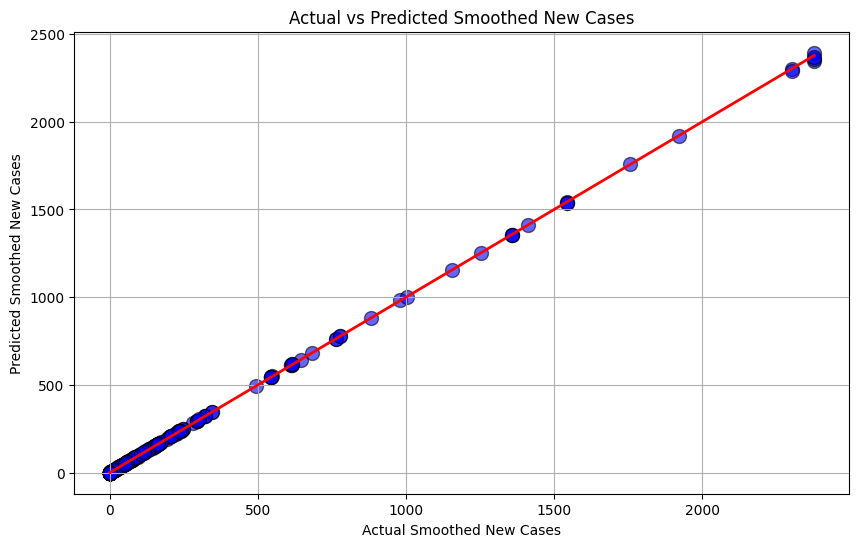

In [ ]:
import matplotlib.pyplot as plt
# Step 8: Visualize the actual vs. predicted data points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', edgecolors='k', alpha=0.6, s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Smoothed New Cases')
plt.ylabel('Predicted Smoothed New Cases')
plt.title('Actual vs Predicted Smoothed New Cases')
plt.grid(True)
plt.show()


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.0 MB/s eta 0:00:00


In [ ]:
from skopt.space import Real, Categorical, Integer
param_grid = {
    'learning_rate': Real(1e-4, 0.1, 'log-uniform'),
    'depth': Integer(2, 16),
    'l2_leaf_reg': Integer(1, 10),
}

In [ ]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(iterations=70)

In [ ]:
import skopt
from skopt import BayesSearchCV
np.int = np.int64

bay_search = BayesSearchCV(estimator = cat_model,
                    search_spaces = param_grid,
                    n_iter = 50,
                    cv = ts_cv,
                    scoring = 'neg_mean_squared_error')

bay_search.fit(X_train, y_train)

0:	learn: 479.7340031	total: 1.13s	remaining: 1m 17s
1:	learn: 479.5625165	total: 2.67s	remaining: 1m 30s
2:	learn: 479.3894540	total: 3.4s	remaining: 1m 15s
3:	learn: 479.2205860	total: 4.05s	remaining: 1m 6s
4:	learn: 479.0247289	total: 4.89s	remaining: 1m 3s
5:	learn: 478.8538928	total: 5.53s	remaining: 59s
6:	learn: 478.6461525	total: 6.2s	remaining: 55.8s
7:	learn: 478.4909159	total: 6.87s	remaining: 53.2s
8:	learn: 478.3335360	total: 7.19s	remaining: 48.7s
9:	learn: 478.1429842	total: 7.5s	remaining: 45s
10:	learn: 477.9610405	total: 7.66s	remaining: 41.1s
11:	learn: 477.7796425	total: 8.45s	remaining: 40.9s
12:	learn: 477.6036078	total: 9.22s	remaining: 40.4s
13:	learn: 477.4558730	total: 11.1s	remaining: 44.5s
14:	learn: 477.2877314	total: 13s	remaining: 47.5s
15:	learn: 477.1135395	total: 14.2s	remaining: 48s
16:	learn: 476.9104018	total: 15.3s	remaining: 47.8s
17:	learn: 476.7203305	total: 15.8s	remaining: 45.6s
18:	learn: 476.5469662	total: 16.9s	remaining: 45.4s
19:	learn: 

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [11, 2, 0.05632286453278499]
  warnings.warn(


0:	learn: 464.1291920	total: 296ms	remaining: 20.4s
1:	learn: 451.2549781	total: 597ms	remaining: 20.3s
2:	learn: 433.2353091	total: 894ms	remaining: 20s
3:	learn: 417.9018878	total: 1.05s	remaining: 17.3s
4:	learn: 405.8569654	total: 1.22s	remaining: 15.9s
5:	learn: 389.8192924	total: 1.37s	remaining: 14.6s
6:	learn: 377.5581376	total: 1.54s	remaining: 13.9s
7:	learn: 364.6200733	total: 1.69s	remaining: 13.1s
8:	learn: 352.5871068	total: 1.85s	remaining: 12.5s
9:	learn: 339.4121245	total: 1.89s	remaining: 11.3s
10:	learn: 328.2252227	total: 2.04s	remaining: 11s
11:	learn: 319.2307882	total: 2.2s	remaining: 10.6s
12:	learn: 307.6839210	total: 2.35s	remaining: 10.3s
13:	learn: 296.5634502	total: 2.35s	remaining: 9.42s
14:	learn: 286.0398642	total: 2.53s	remaining: 9.27s
15:	learn: 277.8094704	total: 2.68s	remaining: 9.05s
16:	learn: 268.7393530	total: 2.83s	remaining: 8.84s
17:	learn: 258.8702091	total: 2.99s	remaining: 8.63s
18:	learn: 251.4607746	total: 3.14s	remaining: 8.44s
19:	lear

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [11, 5, 0.0692536909369366]
  warnings.warn(


0:	learn: 462.2341804	total: 161ms	remaining: 11.1s
1:	learn: 449.9294738	total: 313ms	remaining: 10.6s
2:	learn: 429.5908074	total: 471ms	remaining: 10.5s
3:	learn: 414.7237311	total: 632ms	remaining: 10.4s
4:	learn: 400.2858838	total: 791ms	remaining: 10.3s
5:	learn: 386.4904066	total: 938ms	remaining: 10s
6:	learn: 376.4645934	total: 1.1s	remaining: 9.88s
7:	learn: 360.9143650	total: 1.25s	remaining: 9.67s
8:	learn: 349.2391296	total: 1.4s	remaining: 9.49s
9:	learn: 337.2252602	total: 1.55s	remaining: 9.3s
10:	learn: 328.6697396	total: 1.73s	remaining: 9.25s
11:	learn: 318.3954613	total: 1.8s	remaining: 8.71s
12:	learn: 308.3388628	total: 1.96s	remaining: 8.57s
13:	learn: 299.9429576	total: 2.11s	remaining: 8.43s
14:	learn: 289.6058997	total: 2.27s	remaining: 8.32s
15:	learn: 279.9820631	total: 2.42s	remaining: 8.18s
16:	learn: 272.3252706	total: 2.58s	remaining: 8.06s
17:	learn: 262.4119512	total: 2.64s	remaining: 7.62s
18:	learn: 255.6550996	total: 2.8s	remaining: 7.52s
19:	learn:

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [4, 2, 0.009466307971389188]
  warnings.warn(


0:	learn: 476.7983805	total: 9.7ms	remaining: 669ms
1:	learn: 473.5637560	total: 16.1ms	remaining: 547ms
2:	learn: 470.6963890	total: 22.6ms	remaining: 505ms
3:	learn: 468.1509857	total: 28.3ms	remaining: 466ms
4:	learn: 465.2593202	total: 31.6ms	remaining: 410ms
5:	learn: 462.4675819	total: 35.9ms	remaining: 383ms
6:	learn: 459.8304275	total: 41.8ms	remaining: 376ms
7:	learn: 456.9597776	total: 48.8ms	remaining: 378ms
8:	learn: 454.0334560	total: 56.4ms	remaining: 382ms
9:	learn: 451.5664321	total: 62.7ms	remaining: 376ms
10:	learn: 448.7361747	total: 69.7ms	remaining: 374ms
11:	learn: 445.7579703	total: 72.8ms	remaining: 352ms
12:	learn: 442.8510971	total: 78.9ms	remaining: 346ms
13:	learn: 440.0081859	total: 84.6ms	remaining: 338ms
14:	learn: 437.2166728	total: 92.8ms	remaining: 340ms
15:	learn: 434.6239573	total: 100ms	remaining: 338ms
16:	learn: 431.9009348	total: 107ms	remaining: 334ms
17:	learn: 428.7939631	total: 113ms	remaining: 327ms
18:	learn: 425.9874082	total: 119ms	remain

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [11, 8, 0.0024093300216214996]
  warnings.warn(


0:	learn: 479.3917886	total: 147ms	remaining: 10.1s
1:	learn: 478.9062609	total: 293ms	remaining: 9.97s
2:	learn: 478.2492704	total: 462ms	remaining: 10.3s
3:	learn: 477.7692448	total: 612ms	remaining: 10.1s
4:	learn: 477.1607799	total: 772ms	remaining: 10s
5:	learn: 476.5149780	total: 924ms	remaining: 9.85s
6:	learn: 476.0447506	total: 1.08s	remaining: 9.72s
7:	learn: 475.4331534	total: 1.23s	remaining: 9.54s
8:	learn: 474.9750511	total: 1.39s	remaining: 9.4s
9:	learn: 474.5470255	total: 1.55s	remaining: 9.28s
10:	learn: 474.0717141	total: 1.7s	remaining: 9.12s
11:	learn: 473.6702809	total: 1.78s	remaining: 8.6s
12:	learn: 473.1097468	total: 1.94s	remaining: 8.48s
13:	learn: 472.6888138	total: 2.09s	remaining: 8.34s
14:	learn: 472.2350403	total: 2.24s	remaining: 8.21s
15:	learn: 471.6229070	total: 2.28s	remaining: 7.68s
16:	learn: 471.0140763	total: 2.44s	remaining: 7.6s
17:	learn: 470.5498340	total: 2.6s	remaining: 7.5s
18:	learn: 470.0416188	total: 2.75s	remaining: 7.37s
19:	learn: 

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [6, 7, 0.0007284820171446999]
  warnings.warn(


0:	learn: 479.7311555	total: 8.24ms	remaining: 569ms
1:	learn: 479.5686992	total: 16ms	remaining: 543ms
2:	learn: 479.3847061	total: 23.4ms	remaining: 523ms
3:	learn: 479.1652970	total: 30.6ms	remaining: 506ms
4:	learn: 478.9696519	total: 39.9ms	remaining: 519ms
5:	learn: 478.8162549	total: 47.5ms	remaining: 507ms
6:	learn: 478.6616072	total: 55.3ms	remaining: 497ms
7:	learn: 478.4854417	total: 63.8ms	remaining: 494ms
8:	learn: 478.3311033	total: 71.5ms	remaining: 485ms
9:	learn: 478.1526015	total: 79.1ms	remaining: 475ms
10:	learn: 477.9789235	total: 87.4ms	remaining: 469ms
11:	learn: 477.8408751	total: 96.1ms	remaining: 465ms
12:	learn: 477.6476217	total: 104ms	remaining: 455ms
13:	learn: 477.5075062	total: 111ms	remaining: 445ms
14:	learn: 477.3037047	total: 119ms	remaining: 435ms
15:	learn: 477.1348998	total: 126ms	remaining: 426ms
16:	learn: 476.9232297	total: 134ms	remaining: 418ms
17:	learn: 476.7857587	total: 142ms	remaining: 411ms
18:	learn: 476.6259159	total: 150ms	remaining:

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [5, 2, 0.004981547926633969]
  warnings.warn(


0:	learn: 478.3612607	total: 10.5ms	remaining: 727ms
1:	learn: 476.7500470	total: 20.4ms	remaining: 694ms
2:	learn: 474.8882961	total: 29.8ms	remaining: 665ms
3:	learn: 473.3836157	total: 40ms	remaining: 659ms
4:	learn: 472.0246455	total: 50ms	remaining: 650ms
5:	learn: 470.4137205	total: 59.8ms	remaining: 638ms
6:	learn: 469.0054907	total: 69.8ms	remaining: 628ms
7:	learn: 467.1480269	total: 79.5ms	remaining: 616ms
8:	learn: 465.5354138	total: 90.1ms	remaining: 610ms
9:	learn: 464.0019174	total: 97ms	remaining: 582ms
10:	learn: 462.2784080	total: 106ms	remaining: 566ms
11:	learn: 460.6070987	total: 116ms	remaining: 560ms
12:	learn: 459.0471497	total: 126ms	remaining: 553ms
13:	learn: 457.8214100	total: 137ms	remaining: 547ms
14:	learn: 456.3975482	total: 147ms	remaining: 538ms
15:	learn: 455.0483117	total: 158ms	remaining: 532ms
16:	learn: 453.4678095	total: 168ms	remaining: 524ms
17:	learn: 451.9870666	total: 179ms	remaining: 516ms
18:	learn: 450.4918453	total: 189ms	remaining: 508ms

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [9, 2, 0.00017540498663967127]
  warnings.warn(


0:	learn: 479.8514195	total: 98.1ms	remaining: 6.76s
1:	learn: 479.7988890	total: 144ms	remaining: 4.89s
2:	learn: 479.7466306	total: 192ms	remaining: 4.29s
3:	learn: 479.6958330	total: 236ms	remaining: 3.9s
4:	learn: 479.6429797	total: 249ms	remaining: 3.24s
5:	learn: 479.5904215	total: 294ms	remaining: 3.13s
6:	learn: 479.5247586	total: 359ms	remaining: 3.23s
7:	learn: 479.4743444	total: 383ms	remaining: 2.97s
8:	learn: 479.4172057	total: 428ms	remaining: 2.9s
9:	learn: 479.3631339	total: 474ms	remaining: 2.84s
10:	learn: 479.3050748	total: 520ms	remaining: 2.79s
11:	learn: 479.2473606	total: 570ms	remaining: 2.76s
12:	learn: 479.1886589	total: 615ms	remaining: 2.7s
13:	learn: 479.1300950	total: 660ms	remaining: 2.64s
14:	learn: 479.0840785	total: 704ms	remaining: 2.58s
15:	learn: 479.0285911	total: 749ms	remaining: 2.53s
16:	learn: 478.9687527	total: 806ms	remaining: 2.51s
17:	learn: 478.9139802	total: 852ms	remaining: 2.46s
18:	learn: 478.8603389	total: 897ms	remaining: 2.41s
19:	l

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [14, 3, 0.01603455581342505]
  warnings.warn(


0:	learn: 475.0484121	total: 1.49s	remaining: 1m 42s
1:	learn: 471.7893552	total: 2.98s	remaining: 1m 41s
2:	learn: 467.4731062	total: 3.3s	remaining: 1m 13s
3:	learn: 463.4894275	total: 4.79s	remaining: 1m 19s
4:	learn: 459.5382010	total: 7.11s	remaining: 1m 32s
5:	learn: 454.9316631	total: 9.32s	remaining: 1m 39s
6:	learn: 451.4336859	total: 10.8s	remaining: 1m 37s
7:	learn: 447.7336400	total: 12.3s	remaining: 1m 35s
8:	learn: 443.5358466	total: 13.8s	remaining: 1m 33s
9:	learn: 439.9833482	total: 15.3s	remaining: 1m 31s
10:	learn: 436.6711008	total: 16s	remaining: 1m 25s
11:	learn: 432.7125876	total: 17.5s	remaining: 1m 24s
12:	learn: 429.2444149	total: 17.8s	remaining: 1m 18s
13:	learn: 425.4519365	total: 17.8s	remaining: 1m 11s
14:	learn: 422.3174132	total: 19.8s	remaining: 1m 12s
15:	learn: 418.2929207	total: 22.3s	remaining: 1m 15s
16:	learn: 414.4791844	total: 23.8s	remaining: 1m 14s
17:	learn: 411.0783210	total: 24s	remaining: 1m 9s
18:	learn: 406.8865363	total: 25.5s	remainin

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [14, 2, 0.0007504521952748261]
  warnings.warn(


0:	learn: 479.6966808	total: 1.73s	remaining: 1m 59s
1:	learn: 479.5027370	total: 4.3s	remaining: 2m 26s
2:	learn: 479.2713216	total: 5.99s	remaining: 2m 13s
3:	learn: 479.0552204	total: 7.49s	remaining: 2m 3s
4:	learn: 478.8337247	total: 7.81s	remaining: 1m 41s
5:	learn: 478.5883392	total: 9.31s	remaining: 1m 39s
6:	learn: 478.3608750	total: 9.46s	remaining: 1m 25s
7:	learn: 478.1167916	total: 9.62s	remaining: 1m 14s
8:	learn: 477.8940945	total: 11.1s	remaining: 1m 15s
9:	learn: 477.6981613	total: 12.6s	remaining: 1m 15s
10:	learn: 477.4958410	total: 14.1s	remaining: 1m 15s
11:	learn: 477.2887140	total: 16.2s	remaining: 1m 18s
12:	learn: 477.0718217	total: 18.6s	remaining: 1m 21s
13:	learn: 476.8445282	total: 20.1s	remaining: 1m 20s
14:	learn: 476.6368931	total: 21.6s	remaining: 1m 19s
15:	learn: 476.4053079	total: 23.1s	remaining: 1m 17s
16:	learn: 476.1993339	total: 23.1s	remaining: 1m 12s
17:	learn: 476.0119852	total: 24.6s	remaining: 1m 11s
18:	learn: 475.7833598	total: 26.1s	rema

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [11, 6, 0.00010958774173173813]
  warnings.warn(


0:	learn: 479.8741001	total: 292ms	remaining: 20.1s
1:	learn: 479.8487179	total: 543ms	remaining: 18.5s
2:	learn: 479.8157697	total: 821ms	remaining: 18.3s
3:	learn: 479.7908044	total: 1.08s	remaining: 17.8s
4:	learn: 479.7599733	total: 1.35s	remaining: 17.5s
5:	learn: 479.7304715	total: 1.63s	remaining: 17.3s
6:	learn: 479.7057597	total: 1.88s	remaining: 16.9s
7:	learn: 479.6751454	total: 2.14s	remaining: 16.6s
8:	learn: 479.6509114	total: 2.41s	remaining: 16.3s
9:	learn: 479.6280925	total: 2.72s	remaining: 16.3s
10:	learn: 479.6032134	total: 3.03s	remaining: 16.3s
11:	learn: 479.5821518	total: 3.16s	remaining: 15.3s
12:	learn: 479.5531408	total: 3.44s	remaining: 15.1s
13:	learn: 479.5306794	total: 3.61s	remaining: 14.5s
14:	learn: 479.5065907	total: 3.8s	remaining: 13.9s
15:	learn: 479.4757572	total: 3.83s	remaining: 12.9s
16:	learn: 479.4502669	total: 3.99s	remaining: 12.4s
17:	learn: 479.4269562	total: 4.17s	remaining: 12s
18:	learn: 479.4055483	total: 4.32s	remaining: 11.6s
19:	le

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [12, 8, 0.0001913928194475328]
  warnings.warn(


0:	learn: 479.8633003	total: 312ms	remaining: 21.5s
1:	learn: 479.8193578	total: 642ms	remaining: 21.8s
2:	learn: 479.7880503	total: 956ms	remaining: 21.3s
3:	learn: 479.7587252	total: 1.29s	remaining: 21.2s
4:	learn: 479.7259565	total: 1.6s	remaining: 20.8s
5:	learn: 479.6860329	total: 1.94s	remaining: 20.7s
6:	learn: 479.6525986	total: 1.98s	remaining: 17.8s
7:	learn: 479.6000218	total: 2.05s	remaining: 15.9s
8:	learn: 479.5540746	total: 2.4s	remaining: 16.2s
9:	learn: 479.5157446	total: 2.47s	remaining: 14.8s
10:	learn: 479.4662351	total: 2.81s	remaining: 15.1s
11:	learn: 479.4235646	total: 3.13s	remaining: 15.1s
12:	learn: 479.3718122	total: 3.44s	remaining: 15.1s
13:	learn: 479.3423404	total: 3.78s	remaining: 15.1s
14:	learn: 479.3061312	total: 4.1s	remaining: 15s
15:	learn: 479.2647501	total: 4.42s	remaining: 14.9s
16:	learn: 479.2310228	total: 4.76s	remaining: 14.8s
17:	learn: 479.1961679	total: 5.08s	remaining: 14.7s
18:	learn: 479.1475822	total: 5.4s	remaining: 14.5s
19:	learn

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [12, 3, 0.0020842443800194186]
  warnings.warn(


0:	learn: 479.2643334	total: 304ms	remaining: 21s
1:	learn: 478.6821651	total: 637ms	remaining: 21.7s
2:	learn: 478.1877344	total: 964ms	remaining: 21.5s
3:	learn: 477.7204058	total: 1.28s	remaining: 21.2s
4:	learn: 477.2024606	total: 1.62s	remaining: 21.1s
5:	learn: 476.6685779	total: 1.94s	remaining: 20.7s
6:	learn: 476.1965767	total: 2.27s	remaining: 20.4s
7:	learn: 475.6971403	total: 2.61s	remaining: 20.2s
8:	learn: 475.1356348	total: 2.94s	remaining: 19.9s
9:	learn: 474.6007891	total: 3.26s	remaining: 19.6s
10:	learn: 474.0380404	total: 3.41s	remaining: 18.3s
11:	learn: 473.5581050	total: 3.76s	remaining: 18.2s
12:	learn: 473.0641820	total: 4.09s	remaining: 18s
13:	learn: 472.5020513	total: 4.42s	remaining: 17.7s
14:	learn: 471.9203546	total: 4.75s	remaining: 17.4s
15:	learn: 471.3229032	total: 5.08s	remaining: 17.2s
16:	learn: 470.7869741	total: 5.4s	remaining: 16.8s
17:	learn: 470.1658781	total: 5.73s	remaining: 16.6s
18:	learn: 469.6062612	total: 6.05s	remaining: 16.2s
19:	lear

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [6, 4, 0.03335375289640666]
  warnings.warn(


0:	learn: 470.2750293	total: 8.06ms	remaining: 556ms
1:	learn: 461.8057627	total: 15.2ms	remaining: 516ms
2:	learn: 451.7353193	total: 22.8ms	remaining: 510ms
3:	learn: 441.2575177	total: 30.3ms	remaining: 500ms
4:	learn: 431.8578186	total: 37.9ms	remaining: 492ms
5:	learn: 424.6382733	total: 45.8ms	remaining: 488ms
6:	learn: 416.8290553	total: 53.5ms	remaining: 481ms
7:	learn: 407.4627554	total: 61.1ms	remaining: 473ms
8:	learn: 400.4905281	total: 69ms	remaining: 468ms
9:	learn: 392.4298904	total: 76.5ms	remaining: 459ms
10:	learn: 384.5728839	total: 83.9ms	remaining: 450ms
11:	learn: 378.6620688	total: 91.4ms	remaining: 442ms
12:	learn: 370.7458207	total: 98.9ms	remaining: 434ms
13:	learn: 363.1304899	total: 106ms	remaining: 426ms
14:	learn: 355.0624924	total: 114ms	remaining: 417ms
15:	learn: 348.3696758	total: 121ms	remaining: 409ms
16:	learn: 340.2839262	total: 129ms	remaining: 402ms
17:	learn: 334.7979503	total: 136ms	remaining: 394ms
18:	learn: 329.2334493	total: 145ms	remaining

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [5, 2, 0.003002337224028509]
  warnings.warn(


0:	learn: 478.9728067	total: 4.75ms	remaining: 328ms
1:	learn: 478.0003002	total: 9.52ms	remaining: 324ms
2:	learn: 476.8750102	total: 14.4ms	remaining: 322ms
3:	learn: 475.9636508	total: 19.3ms	remaining: 319ms
4:	learn: 475.1398469	total: 24.1ms	remaining: 313ms
5:	learn: 474.1617160	total: 28.6ms	remaining: 306ms
6:	learn: 473.3047905	total: 33.4ms	remaining: 300ms
7:	learn: 472.1738222	total: 38.1ms	remaining: 295ms
8:	learn: 471.1901277	total: 42.9ms	remaining: 291ms
9:	learn: 470.2531596	total: 47.7ms	remaining: 286ms
10:	learn: 469.1991003	total: 52.6ms	remaining: 282ms
11:	learn: 468.1741425	total: 57.5ms	remaining: 278ms
12:	learn: 467.2159739	total: 62.6ms	remaining: 275ms
13:	learn: 466.4620744	total: 67.5ms	remaining: 270ms
14:	learn: 465.5855156	total: 72.4ms	remaining: 265ms
15:	learn: 464.7529650	total: 77.4ms	remaining: 261ms
16:	learn: 463.7766383	total: 82.3ms	remaining: 257ms
17:	learn: 462.8608091	total: 87.2ms	remaining: 252ms
18:	learn: 461.9342057	total: 92ms	rem

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [6, 2, 0.03807865864414872]
  warnings.warn(


0:	learn: 468.1888196	total: 7.47ms	remaining: 515ms
1:	learn: 457.2180073	total: 14.5ms	remaining: 493ms
2:	learn: 445.9446508	total: 21.8ms	remaining: 488ms
3:	learn: 434.0209396	total: 29.7ms	remaining: 490ms
4:	learn: 421.5840766	total: 37.7ms	remaining: 490ms
5:	learn: 412.9723549	total: 45.4ms	remaining: 485ms
6:	learn: 402.2351577	total: 52.9ms	remaining: 476ms
7:	learn: 390.6350053	total: 60.5ms	remaining: 469ms
8:	learn: 381.2068170	total: 68ms	remaining: 461ms
9:	learn: 371.6539531	total: 75.3ms	remaining: 452ms
10:	learn: 364.2197168	total: 82.8ms	remaining: 444ms
11:	learn: 356.1614499	total: 90.4ms	remaining: 437ms
12:	learn: 346.5562935	total: 97.9ms	remaining: 429ms
13:	learn: 338.4297782	total: 106ms	remaining: 423ms
14:	learn: 330.1427386	total: 111ms	remaining: 408ms
15:	learn: 322.0192563	total: 119ms	remaining: 400ms
16:	learn: 312.7343518	total: 128ms	remaining: 398ms
17:	learn: 305.3899806	total: 135ms	remaining: 390ms
18:	learn: 297.9427246	total: 145ms	remaining

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [5, 10, 0.006552544058401422]
  warnings.warn(


0:	learn: 478.2234933	total: 10.2ms	remaining: 704ms
1:	learn: 476.9632582	total: 15.3ms	remaining: 520ms
2:	learn: 475.3583647	total: 20.2ms	remaining: 452ms
3:	learn: 473.5981565	total: 24.9ms	remaining: 410ms
4:	learn: 472.5338087	total: 29.6ms	remaining: 385ms
5:	learn: 470.9110395	total: 34.4ms	remaining: 367ms
6:	learn: 469.6682835	total: 41.6ms	remaining: 375ms
7:	learn: 467.9960228	total: 48ms	remaining: 372ms
8:	learn: 466.4150171	total: 52.8ms	remaining: 358ms
9:	learn: 464.7423642	total: 57.5ms	remaining: 345ms
10:	learn: 463.2833427	total: 62.7ms	remaining: 336ms
11:	learn: 461.7857728	total: 67.8ms	remaining: 328ms
12:	learn: 460.2886508	total: 72.5ms	remaining: 318ms
13:	learn: 459.2507375	total: 77.3ms	remaining: 309ms
14:	learn: 457.9537419	total: 82.1ms	remaining: 301ms
15:	learn: 456.8135215	total: 87ms	remaining: 294ms
16:	learn: 455.4221126	total: 91.9ms	remaining: 287ms
17:	learn: 453.9169588	total: 96.8ms	remaining: 280ms
18:	learn: 452.3667264	total: 102ms	remain

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [12, 8, 0.00025872737668177886]
  warnings.warn(


0:	learn: 479.8501390	total: 315ms	remaining: 21.7s
1:	learn: 479.7907390	total: 653ms	remaining: 22.2s
2:	learn: 479.7484203	total: 979ms	remaining: 21.9s
3:	learn: 479.7087823	total: 1.3s	remaining: 21.5s
4:	learn: 479.6644910	total: 1.64s	remaining: 21.3s
5:	learn: 479.6105301	total: 1.97s	remaining: 21s
6:	learn: 479.5653430	total: 2.01s	remaining: 18.1s
7:	learn: 479.4942841	total: 2.08s	remaining: 16.1s
8:	learn: 479.4321879	total: 2.42s	remaining: 16.4s
9:	learn: 479.3803882	total: 2.49s	remaining: 14.9s
10:	learn: 479.3134827	total: 2.81s	remaining: 15.1s
11:	learn: 479.2558217	total: 3.14s	remaining: 15.2s
12:	learn: 479.1858898	total: 3.48s	remaining: 15.2s
13:	learn: 479.1460673	total: 3.8s	remaining: 15.2s
14:	learn: 479.0971421	total: 4.14s	remaining: 15.2s
15:	learn: 479.0412300	total: 4.47s	remaining: 15.1s
16:	learn: 478.9956612	total: 4.79s	remaining: 14.9s
17:	learn: 478.9485719	total: 5.12s	remaining: 14.8s
18:	learn: 478.8829316	total: 5.54s	remaining: 14.9s
19:	lea

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [10, 6, 0.09528088663801708]
  warnings.warn(


0:	learn: 456.8309471	total: 75.2ms	remaining: 5.19s
1:	learn: 439.4426416	total: 153ms	remaining: 5.2s
2:	learn: 421.3424409	total: 230ms	remaining: 5.14s
3:	learn: 403.1068817	total: 316ms	remaining: 5.22s
4:	learn: 380.6894228	total: 392ms	remaining: 5.1s
5:	learn: 362.0164955	total: 465ms	remaining: 4.96s
6:	learn: 343.9818301	total: 547ms	remaining: 4.92s
7:	learn: 327.2620042	total: 639ms	remaining: 4.95s
8:	learn: 313.8939761	total: 714ms	remaining: 4.84s
9:	learn: 299.9061675	total: 725ms	remaining: 4.35s
10:	learn: 288.7394908	total: 809ms	remaining: 4.34s
11:	learn: 278.1712135	total: 884ms	remaining: 4.27s
12:	learn: 268.3663126	total: 958ms	remaining: 4.2s
13:	learn: 259.5630962	total: 1.04s	remaining: 4.18s
14:	learn: 249.0857812	total: 1.12s	remaining: 4.1s
15:	learn: 239.5355748	total: 1.19s	remaining: 4.02s
16:	learn: 232.0552203	total: 1.28s	remaining: 4s
17:	learn: 223.8380751	total: 1.35s	remaining: 3.92s
18:	learn: 215.8151583	total: 1.43s	remaining: 3.84s
19:	learn

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [5, 3, 0.005322740750475992]
  warnings.warn(


0:	learn: 478.2797238	total: 6.91ms	remaining: 477ms
1:	learn: 476.7150095	total: 12.3ms	remaining: 417ms
2:	learn: 474.8289591	total: 17.2ms	remaining: 385ms
3:	learn: 473.3847226	total: 22ms	remaining: 364ms
4:	learn: 472.1398032	total: 26.7ms	remaining: 347ms
5:	learn: 470.5629866	total: 31.4ms	remaining: 335ms
6:	learn: 469.2068530	total: 36.2ms	remaining: 326ms
7:	learn: 467.3341961	total: 40.9ms	remaining: 317ms
8:	learn: 465.7729514	total: 45.7ms	remaining: 310ms
9:	learn: 464.0997045	total: 50.5ms	remaining: 303ms
10:	learn: 462.3931133	total: 55.3ms	remaining: 297ms
11:	learn: 460.6945001	total: 60.3ms	remaining: 291ms
12:	learn: 458.9698374	total: 65ms	remaining: 285ms
13:	learn: 457.5794918	total: 69.9ms	remaining: 279ms
14:	learn: 456.2325888	total: 74.7ms	remaining: 274ms
15:	learn: 454.9434030	total: 79.5ms	remaining: 268ms
16:	learn: 453.4116607	total: 84.2ms	remaining: 263ms
17:	learn: 451.9767411	total: 88.9ms	remaining: 257ms
18:	learn: 450.2619260	total: 93.7ms	remai

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [10, 4, 0.00023191480770258605]
  warnings.warn(


0:	learn: 479.8361705	total: 81ms	remaining: 5.59s
1:	learn: 479.7817085	total: 157ms	remaining: 5.35s
2:	learn: 479.7234988	total: 233ms	remaining: 5.19s
3:	learn: 479.6634501	total: 319ms	remaining: 5.26s
4:	learn: 479.5880611	total: 402ms	remaining: 5.22s
5:	learn: 479.5267662	total: 475ms	remaining: 5.06s
6:	learn: 479.4582187	total: 556ms	remaining: 5s
7:	learn: 479.4001764	total: 631ms	remaining: 4.89s
8:	learn: 479.3397686	total: 654ms	remaining: 4.43s
9:	learn: 479.2754019	total: 728ms	remaining: 4.37s
10:	learn: 479.2161189	total: 825ms	remaining: 4.42s
11:	learn: 479.1547403	total: 901ms	remaining: 4.35s
12:	learn: 479.0962341	total: 979ms	remaining: 4.29s
13:	learn: 479.0318298	total: 1.06s	remaining: 4.24s
14:	learn: 478.9548558	total: 1.14s	remaining: 4.16s
15:	learn: 478.8973675	total: 1.21s	remaining: 4.09s
16:	learn: 478.8256111	total: 1.3s	remaining: 4.05s
17:	learn: 478.7664908	total: 1.37s	remaining: 3.96s
18:	learn: 478.7068080	total: 1.45s	remaining: 3.88s
19:	lear

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [4, 3, 0.0011297019126157231]
  warnings.warn(


0:	learn: 479.5561674	total: 3.46ms	remaining: 239ms
1:	learn: 479.1896348	total: 6.32ms	remaining: 215ms
2:	learn: 478.8783927	total: 9.07ms	remaining: 203ms
3:	learn: 478.5814399	total: 11.9ms	remaining: 196ms
4:	learn: 478.2548686	total: 15ms	remaining: 196ms
5:	learn: 477.9459949	total: 18.1ms	remaining: 194ms
6:	learn: 477.6524259	total: 21.2ms	remaining: 191ms
7:	learn: 477.3473901	total: 24.5ms	remaining: 190ms
8:	learn: 476.9800081	total: 27.6ms	remaining: 187ms
9:	learn: 476.6439417	total: 30.7ms	remaining: 184ms
10:	learn: 476.3156182	total: 33.7ms	remaining: 181ms
11:	learn: 475.9721187	total: 36.8ms	remaining: 178ms
12:	learn: 475.6104308	total: 39.8ms	remaining: 175ms
13:	learn: 475.2744698	total: 43ms	remaining: 172ms
14:	learn: 474.9441218	total: 46.2ms	remaining: 170ms
15:	learn: 474.6427752	total: 49.5ms	remaining: 167ms
16:	learn: 474.2827145	total: 52.7ms	remaining: 164ms
17:	learn: 473.8893334	total: 55.7ms	remaining: 161ms
18:	learn: 473.5566401	total: 58.7ms	remai

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [2, 4, 0.02017288761427082]
  warnings.warn(


0:	learn: 473.4165839	total: 1.31ms	remaining: 90.6ms
1:	learn: 468.5359149	total: 2.94ms	remaining: 99.8ms
2:	learn: 462.5459025	total: 4.43ms	remaining: 99ms
3:	learn: 457.2092126	total: 5.96ms	remaining: 98.3ms
4:	learn: 451.9906878	total: 7.45ms	remaining: 96.8ms
5:	learn: 446.2169774	total: 8.94ms	remaining: 95.3ms
6:	learn: 442.4874069	total: 10.4ms	remaining: 93.8ms
7:	learn: 436.2767838	total: 12ms	remaining: 92.8ms
8:	learn: 431.0686764	total: 13.5ms	remaining: 91.6ms
9:	learn: 426.5969345	total: 15ms	remaining: 90.2ms
10:	learn: 421.2744418	total: 16.4ms	remaining: 87.8ms
11:	learn: 416.1353227	total: 18.4ms	remaining: 88.8ms
12:	learn: 412.7686347	total: 21.4ms	remaining: 93.8ms
13:	learn: 407.4498105	total: 23.6ms	remaining: 94.2ms
14:	learn: 401.8984067	total: 29.6ms	remaining: 109ms
15:	learn: 397.6541520	total: 32ms	remaining: 108ms
16:	learn: 393.0768874	total: 34.7ms	remaining: 108ms
17:	learn: 387.9238537	total: 37.5ms	remaining: 108ms
18:	learn: 383.1769344	total: 40

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [10, 6, 0.0037925040411019577]
  warnings.warn(


0:	learn: 478.9795804	total: 72.4ms	remaining: 5s
1:	learn: 478.2460190	total: 145ms	remaining: 4.92s
2:	learn: 477.4445011	total: 218ms	remaining: 4.87s
3:	learn: 476.6018905	total: 299ms	remaining: 4.93s
4:	learn: 475.5179280	total: 372ms	remaining: 4.83s
5:	learn: 474.5620093	total: 444ms	remaining: 4.73s
6:	learn: 473.5503513	total: 535ms	remaining: 4.82s
7:	learn: 472.5620305	total: 618ms	remaining: 4.79s
8:	learn: 471.6652374	total: 654ms	remaining: 4.43s
9:	learn: 470.8214131	total: 728ms	remaining: 4.37s
10:	learn: 470.0755391	total: 813ms	remaining: 4.36s
11:	learn: 469.0881452	total: 886ms	remaining: 4.28s
12:	learn: 468.3095207	total: 958ms	remaining: 4.2s
13:	learn: 467.4834306	total: 1.04s	remaining: 4.16s
14:	learn: 466.5284014	total: 1.11s	remaining: 4.08s
15:	learn: 465.5576687	total: 1.19s	remaining: 4s
16:	learn: 464.4708123	total: 1.27s	remaining: 3.96s
17:	learn: 463.3858932	total: 1.34s	remaining: 3.88s
18:	learn: 462.3506114	total: 1.42s	remaining: 3.8s
19:	learn:

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [14, 1, 0.0005728744426331812]
  warnings.warn(


0:	learn: 479.7083915	total: 1.53s	remaining: 1m 45s
1:	learn: 479.5212566	total: 3.04s	remaining: 1m 43s
2:	learn: 479.3117401	total: 4.54s	remaining: 1m 41s
3:	learn: 479.1142479	total: 6.04s	remaining: 1m 39s
4:	learn: 478.9103272	total: 6.36s	remaining: 1m 22s
5:	learn: 478.7028375	total: 7.03s	remaining: 1m 15s
6:	learn: 478.5127913	total: 8.52s	remaining: 1m 16s
7:	learn: 478.3109331	total: 10.5s	remaining: 1m 21s
8:	learn: 478.1033920	total: 10.6s	remaining: 1m 11s
9:	learn: 477.8856092	total: 13s	remaining: 1m 18s
10:	learn: 477.7020753	total: 14.6s	remaining: 1m 18s
11:	learn: 477.5001373	total: 15.2s	remaining: 1m 13s
12:	learn: 477.3205810	total: 16.7s	remaining: 1m 13s
13:	learn: 477.1392838	total: 18.2s	remaining: 1m 12s
14:	learn: 476.9689137	total: 19.7s	remaining: 1m 12s
15:	learn: 476.7749497	total: 19.8s	remaining: 1m 6s
16:	learn: 476.5795946	total: 21.2s	remaining: 1m 6s
17:	learn: 476.4097353	total: 22.7s	remaining: 1m 5s
18:	learn: 476.2079738	total: 24.9s	remaini

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [7, 5, 0.0017230143412604658]
  warnings.warn(


0:	learn: 479.4444104	total: 15ms	remaining: 1.03s
1:	learn: 478.9850731	total: 28.9ms	remaining: 984ms
2:	learn: 478.5643739	total: 42ms	remaining: 939ms
3:	learn: 478.2035269	total: 55.6ms	remaining: 917ms
4:	learn: 477.7935799	total: 69.3ms	remaining: 901ms
5:	learn: 477.3694194	total: 83ms	remaining: 885ms
6:	learn: 476.8513878	total: 98.7ms	remaining: 889ms
7:	learn: 476.3987973	total: 112ms	remaining: 872ms
8:	learn: 475.9589240	total: 129ms	remaining: 872ms
9:	learn: 475.5480720	total: 145ms	remaining: 869ms
10:	learn: 475.0726974	total: 159ms	remaining: 852ms
11:	learn: 474.7209521	total: 173ms	remaining: 837ms
12:	learn: 474.3263313	total: 188ms	remaining: 822ms
13:	learn: 473.7762658	total: 201ms	remaining: 804ms
14:	learn: 473.3476249	total: 218ms	remaining: 799ms
15:	learn: 473.0045094	total: 236ms	remaining: 796ms
16:	learn: 472.5096857	total: 249ms	remaining: 776ms
17:	learn: 472.0993778	total: 262ms	remaining: 757ms
18:	learn: 471.7157431	total: 276ms	remaining: 741ms
19

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [12, 4, 0.0001000629446714953]
  warnings.warn(


0:	learn: 479.8746613	total: 319ms	remaining: 22s
1:	learn: 479.8437012	total: 652ms	remaining: 22.2s
2:	learn: 479.8227677	total: 997ms	remaining: 22.3s
3:	learn: 479.8031195	total: 1.32s	remaining: 21.9s
4:	learn: 479.7809083	total: 1.66s	remaining: 21.5s
5:	learn: 479.7580761	total: 2s	remaining: 21.3s
6:	learn: 479.7381368	total: 2.32s	remaining: 20.9s
7:	learn: 479.7118135	total: 2.65s	remaining: 20.6s
8:	learn: 479.6882435	total: 2.98s	remaining: 20.2s
9:	learn: 479.6620621	total: 3.31s	remaining: 19.9s
10:	learn: 479.6379267	total: 3.46s	remaining: 18.6s
11:	learn: 479.6174618	total: 3.79s	remaining: 18.3s
12:	learn: 479.5964843	total: 4.13s	remaining: 18.1s
13:	learn: 479.5716328	total: 4.45s	remaining: 17.8s
14:	learn: 479.5461265	total: 4.78s	remaining: 17.5s
15:	learn: 479.5196776	total: 5.11s	remaining: 17.3s
16:	learn: 479.4960135	total: 5.43s	remaining: 16.9s
17:	learn: 479.4684524	total: 5.85s	remaining: 16.9s
18:	learn: 479.4382560	total: 6.45s	remaining: 17.3s
19:	lear

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [2, 9, 0.0023994797802393947]
  warnings.warn(


0:	learn: 479.2770655	total: 1.69ms	remaining: 117ms
1:	learn: 478.6657614	total: 3.41ms	remaining: 116ms
2:	learn: 478.0817694	total: 4.77ms	remaining: 107ms
3:	learn: 477.5224560	total: 6.18ms	remaining: 102ms
4:	learn: 476.9596471	total: 7.49ms	remaining: 97.4ms
5:	learn: 476.4703035	total: 8.82ms	remaining: 94.1ms
6:	learn: 476.0943929	total: 10.2ms	remaining: 92ms
7:	learn: 475.5191767	total: 11.6ms	remaining: 90.1ms
8:	learn: 474.9286863	total: 13ms	remaining: 88.2ms
9:	learn: 474.4403992	total: 14.3ms	remaining: 86ms
10:	learn: 473.8586963	total: 15.7ms	remaining: 84ms
11:	learn: 473.2681584	total: 17ms	remaining: 82.1ms
12:	learn: 472.7676413	total: 18.3ms	remaining: 80.2ms
13:	learn: 472.2552286	total: 19.6ms	remaining: 78.5ms
14:	learn: 471.6055891	total: 21ms	remaining: 77ms
15:	learn: 471.0167891	total: 22.4ms	remaining: 75.6ms
16:	learn: 470.5058669	total: 23.8ms	remaining: 74.1ms
17:	learn: 469.9473735	total: 25.1ms	remaining: 72.6ms
18:	learn: 469.3767349	total: 26.4ms	r

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [11, 2, 0.018119882725814194]
  warnings.warn(


0:	learn: 474.8202759	total: 144ms	remaining: 9.93s
1:	learn: 470.5645954	total: 290ms	remaining: 9.85s
2:	learn: 464.4879656	total: 453ms	remaining: 10.1s
3:	learn: 459.1355409	total: 602ms	remaining: 9.94s
4:	learn: 454.8329014	total: 773ms	remaining: 10s
5:	learn: 449.8765810	total: 926ms	remaining: 9.88s
6:	learn: 445.1483214	total: 1.09s	remaining: 9.86s
7:	learn: 440.1611009	total: 1.24s	remaining: 9.61s
8:	learn: 434.9226384	total: 1.4s	remaining: 9.51s
9:	learn: 429.8625610	total: 1.44s	remaining: 8.64s
10:	learn: 425.2038879	total: 1.6s	remaining: 8.57s
11:	learn: 421.3819081	total: 1.85s	remaining: 8.95s
12:	learn: 416.3757017	total: 2.11s	remaining: 9.26s
13:	learn: 411.8878271	total: 2.13s	remaining: 8.52s
14:	learn: 407.3434262	total: 2.43s	remaining: 8.91s
15:	learn: 402.6757322	total: 2.71s	remaining: 9.16s
16:	learn: 398.3036640	total: 2.98s	remaining: 9.28s
17:	learn: 393.6396267	total: 3.27s	remaining: 9.45s
18:	learn: 389.1914912	total: 3.53s	remaining: 9.46s
19:	lea

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [2, 1, 0.1] before, using random point [8, 2, 0.00037381408965462523]
  warnings.warn(


0:	learn: 479.7955906	total: 36ms	remaining: 2.48s
1:	learn: 479.6737774	total: 59.5ms	remaining: 2.02s
2:	learn: 479.5588536	total: 83.9ms	remaining: 1.87s
3:	learn: 479.4252933	total: 107ms	remaining: 1.77s
4:	learn: 479.3030212	total: 130ms	remaining: 1.69s
5:	learn: 479.2033179	total: 153ms	remaining: 1.63s
6:	learn: 479.1043138	total: 177ms	remaining: 1.59s
7:	learn: 478.9977183	total: 204ms	remaining: 1.58s
8:	learn: 478.8772129	total: 227ms	remaining: 1.54s
9:	learn: 478.7492099	total: 261ms	remaining: 1.56s
10:	learn: 478.6260825	total: 284ms	remaining: 1.52s
11:	learn: 478.5113105	total: 308ms	remaining: 1.49s
12:	learn: 478.3950494	total: 331ms	remaining: 1.45s
13:	learn: 478.2611308	total: 344ms	remaining: 1.38s
14:	learn: 478.1465003	total: 368ms	remaining: 1.35s
15:	learn: 478.0521411	total: 396ms	remaining: 1.34s
16:	learn: 477.9268164	total: 420ms	remaining: 1.31s
17:	learn: 477.8186070	total: 444ms	remaining: 1.28s
18:	learn: 477.7117869	total: 474ms	remaining: 1.27s
19

BayesSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=1255, n_splits=3, test_size=314),
              estimator=<catboost.core.CatBoostRegressor object at 0x7d970aa03130>,
              scoring='neg_mean_squared_error',
              search_spaces={'depth': Integer(low=2, high=16, prior='uniform', transform='normalize'),
                             'l2_leaf_reg': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.0001, high=0.1, prior='log-uniform', transform='normalize')})

In [ ]:
best_params = bay_search.best_params_
best_model = bay_search.best_estimator_

In [ ]:
predictions = best_model.predict(X_test).reshape(-1,1)

In [ ]:
RMSE = np.sqrt(MSE(predictions,y_test))
RMSE

46.66468463402087

In [ ]:
from sklearn.metrics import r2_score as R2
R2_score=R2(predictions,y_test)
R2_score

0.9882045049962024

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(predictions, y_test)
MAPE

0.4576496105947274

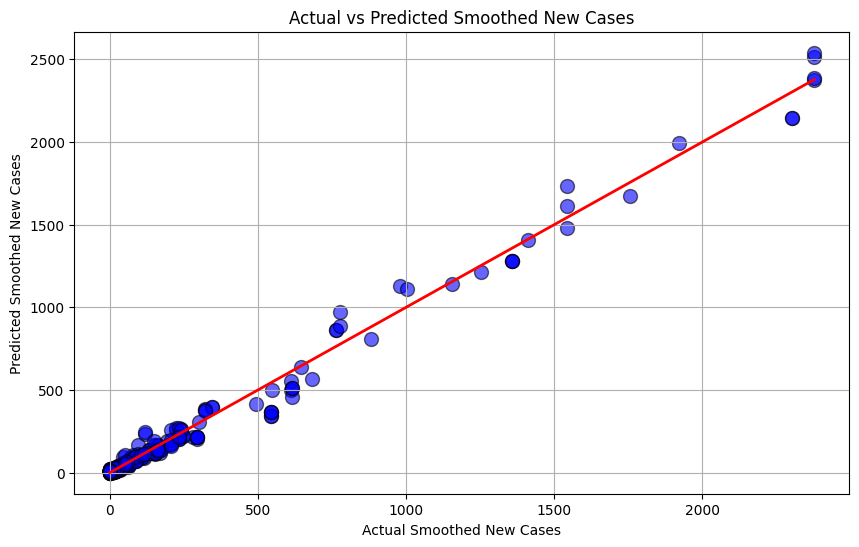

In [ ]:
import matplotlib.pyplot as plt
# Step 8: Visualize the actual vs. predicted data points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', edgecolors='k', alpha=0.6, s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Smoothed New Cases')
plt.ylabel('Predicted Smoothed New Cases')
plt.title('Actual vs Predicted Smoothed New Cases')
plt.grid(True)
plt.show()
